In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [4]:
cancer = pd.read_csv('dataset/wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
cancer['diagnosis'] = cancer['diagnosis'].replace({
    "M" : "Malignant",
    "B": "Benign"
})

cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
standardized_cancer = cancer.copy()

In [8]:
columns_to_exclude = ['id', 'diagnosis']
columns_to_scale = standardized_cancer.columns.difference(columns_to_exclude)

In [9]:
scaler = StandardScaler()
standardized_cancer[columns_to_scale] = scaler.fit_transform(standardized_cancer[columns_to_scale])

In [10]:
standardized_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,Malignant,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,Malignant,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,Malignant,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,Malignant,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,Malignant,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,Malignant,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,Malignant,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [13]:
#set seed
np.random.seed(1)

#split the data

cancer_train, cancer_test = train_test_split(
    standardized_cancer, train_size = 0.75, shuffle = True, 
    stratify = standardized_cancer['diagnosis']
)

In [14]:
cancer_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 164 to 284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       426 non-null    int64  
 1   diagnosis                426 non-null    object 
 2   radius_mean              426 non-null    float64
 3   texture_mean             426 non-null    float64
 4   perimeter_mean           426 non-null    float64
 5   area_mean                426 non-null    float64
 6   smoothness_mean          426 non-null    float64
 7   compactness_mean         426 non-null    float64
 8   concavity_mean           426 non-null    float64
 9   concave points_mean      426 non-null    float64
 10  symmetry_mean            426 non-null    float64
 11  fractal_dimension_mean   426 non-null    float64
 12  radius_se                426 non-null    float64
 13  texture_se               426 non-null    float64
 14  perimeter_se            

In [15]:
cancer_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 357 to 332
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       143 non-null    int64  
 1   diagnosis                143 non-null    object 
 2   radius_mean              143 non-null    float64
 3   texture_mean             143 non-null    float64
 4   perimeter_mean           143 non-null    float64
 5   area_mean                143 non-null    float64
 6   smoothness_mean          143 non-null    float64
 7   compactness_mean         143 non-null    float64
 8   concavity_mean           143 non-null    float64
 9   concave points_mean      143 non-null    float64
 10  symmetry_mean            143 non-null    float64
 11  fractal_dimension_mean   143 non-null    float64
 12  radius_se                143 non-null    float64
 13  texture_se               143 non-null    float64
 14  perimeter_se            

In [16]:
#k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [17]:
#define our variables ; X and y
X = cancer_train[["perimeter_mean","concavity_mean"]]
y = cancer_train['diagnosis']

In [18]:
#fit our model
knn.fit(X,y)

KNeighborsClassifier()

In [19]:
cancer_test['predicted'] = knn.predict(cancer_test[["perimeter_mean","concavity_mean"]])

cancer_test[["diagnosis","predicted"]]

,diagnosis,predicted
357,Benign,Benign
361,Benign,Benign
212,Malignant,Malignant
527,Benign,Benign
21,Benign,Benign
...,...,...
364,Benign,Benign
434,Benign,Benign
299,Benign,Benign
488,Benign,Benign


In [ ]:
#accuracy for test data
knn.score(cancer_test[["perimeter_mean","concavity_mean"]],cancer_test["diagnosis"])

0.9230769230769231

In [23]:
#confusion matrix

pd.crosstab(
    cancer_test["diagnosis"],
    cancer_test["predicted"],
    rownames = ["Actual"],
    colnames = ["Predicted"]
)

Predicted,Benign,Malignant
Actual,,
Benign,88,2
Malignant,9,44


In [24]:
precision_score(
    y_true = cancer_test["diagnosis"],
    y_pred = cancer_test['predicted'],
    pos_label = "Malignant"
)

0.9565217391304348

In [25]:
recall_score(
   y_true = cancer_test['diagnosis'],
   y_pred = cancer_test['predicted'],
   pos_label = "Malignant"
)

0.8301886792452831

In [37]:
cancer_subtrain, cancer_validation = train_test_split(cancer_train, train_size= 0.75,
                                                     stratify = cancer_train["diagnosis"])

In [38]:
knn = KNeighborsClassifier(n_neighbors= 3)
X = cancer_subtrain[["perimeter_mean","concavity_mean"]]
y = cancer_subtrain["diagnosis"]
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [39]:
#compute score on validation
acc = knn.score(
    cancer_validation[["perimeter_mean","concavity_mean"]],
    cancer_validation["diagnosis"]
)
acc

0.897196261682243

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
X = cancer_train[["perimeter_mean","concavity_mean"]]
y = cancer_train['diagnosis']

returned_dictionary = cross_validate(
    estimator = knn,
    cv = 5,
    X = X,
    y = y
)

cv_5_df = pd.DataFrame(returned_dictionary)
cv_5_df

,fit_time,score_time,test_score
0,0.010476,0.019072,0.930233
1,0.003695,0.004912,0.894118
2,0.002568,0.006499,0.870588
3,0.014486,0.028369,0.952941
4,0.013098,0.010131,0.917647


In [41]:
cv_5_metrics = cv_5_df.agg(["mean","sem"])
cv_5_metrics

,fit_time,score_time,test_score
mean,0.008865,0.013797,0.913105
sem,0.002434,0.004392,0.014264


In [60]:
parameter_grid = {
    "n_neighbors" : range(1,100,5)
}

In [61]:
cancer_tune_grid = GridSearchCV(
    estimator = knn,
    param_grid= parameter_grid,
    cv = 10
)

In [62]:
cancer_tune_grid.fit(
    cancer_train[["perimeter_mean", "concavity_mean"]],
    cancer_train['diagnosis']
)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 100, 5)})

In [63]:
accuracy_grid = pd.DataFrame(cancer_tune_grid.cv_results_)
accuracy_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004927,0.002544,0.007713,0.002053,1,{'n_neighbors': 1},0.953488,0.837209,0.906977,0.860465,0.813953,0.837209,0.880952,0.904762,0.880952,0.880952,0.875692,0.038684,20
1,0.006205,0.002044,0.009256,0.003887,6,{'n_neighbors': 6},0.930233,0.953488,0.906977,0.837209,0.837209,0.906977,0.928571,0.928571,0.880952,0.976190,0.908638,0.043373,18
2,0.003928,0.000814,0.006543,0.001193,11,{'n_neighbors': 11},0.906977,0.930233,0.906977,0.837209,0.837209,0.883721,0.952381,0.904762,0.928571,0.952381,0.904042,0.039147,19
3,0.004453,0.000908,0.006600,0.001631,16,{'n_neighbors': 16},0.906977,0.953488,0.930233,0.837209,0.837209,0.930233,0.952381,0.952381,0.928571,0.976190,0.920487,0.045315,1
4,0.005512,0.002091,0.006711,0.000964,21,{'n_neighbors': 21},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.952381,0.880952,0.976190,0.913400,0.046495,11
5,0.003768,0.000858,0.006578,0.001180,26,{'n_neighbors': 26},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.928571,0.904762,0.976190,0.913400,0.043989,11
6,0.004372,0.001001,0.006401,0.001315,31,{'n_neighbors': 31},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.928571,0.904762,0.976190,0.913400,0.043989,11
7,0.003675,0.000891,0.006684,0.001395,36,{'n_neighbors': 36},0.906977,0.953488,0.930233,0.837209,0.837209,0.883721,0.928571,0.952381,0.904762,0.976190,0.911074,0.044873,16
8,0.004309,0.001205,0.005873,0.001126,41,{'n_neighbors': 41},0.906977,0.953488,0.930233,0.837209,0.837209,0.883721,0.952381,0.928571,0.904762,0.976190,0.911074,0.044873,16
9,0.003698,0.001003,0.006654,0.001187,46,{'n_neighbors': 46},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.952381,0.904762,0.976190,0.915781,0.045368,8


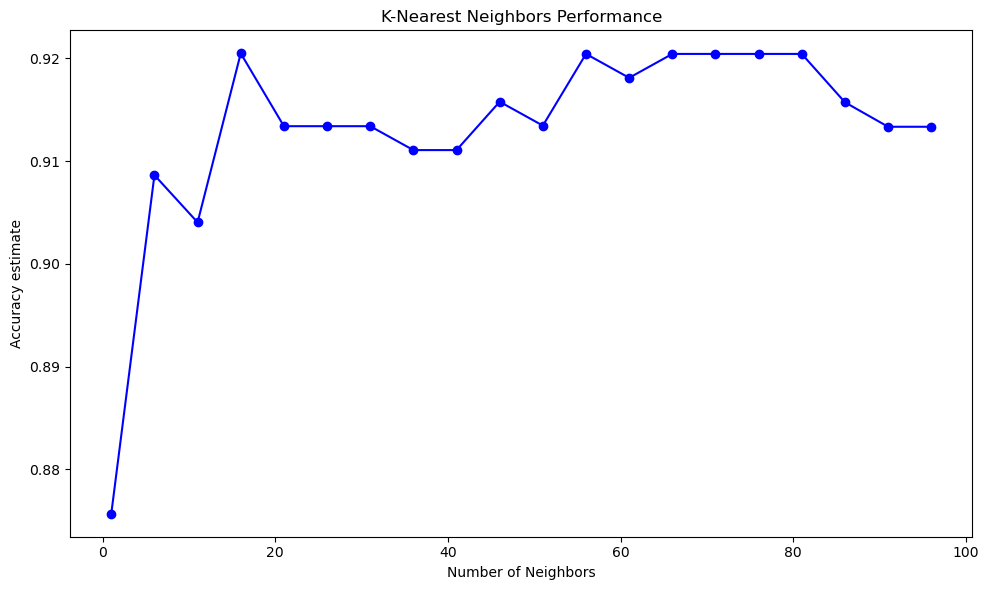

In [64]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracy_grid['param_n_neighbors'], accuracy_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()


In [59]:
cancer_tune_grid.best_params_

{'n_neighbors': 16}